## A Guided Exploration of UN Data (Gross Domestic Product and Internet Usage)

---

3. Import the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

4. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


---

5. How many rows and columns are in gdp_df? What are the data types of each column?

In [3]:
gdp_df.shape

(7662, 4)

7662 rows, 4 columns

In [4]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

string, int, float, float

---

6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')

gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [6]:
gdp_df = gdp_df.rename(columns = {'Country or Area' : 'Country', 'Value' : 'GDP_Per_Capita'})

gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


---

7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [7]:
obs_by_country = gdp_df.groupby('Country').count().sort_values(by = 'Year', ascending = False)

obs_by_country

,Year,GDP_Per_Capita
Country,,
Least developed countries: UN classification,33,33
Middle East & North Africa,33,33
Middle East & North Africa (excluding high income),33,33
Middle income,33,33
Mongolia,33,33
...,...,...
Kosovo,15,15
Sint Maarten (Dutch part),14,14
Turks and Caicos Islands,12,12


In [8]:
obs_by_country[obs_by_country['Year'] == 33]

,Year,GDP_Per_Capita
Country,,
Least developed countries: UN classification,33,33
Middle East & North Africa,33,33
Middle East & North Africa (excluding high income),33,33
Middle income,33,33
Mongolia,33,33
...,...,...
Europe & Central Asia (IDA & IBRD),33,33
Europe & Central Asia (excluding high income),33,33
Georgia,33,33


It looks like 202 countries have data for all (33) years.  Note that some of these are not countries (Middle East & North Africa).  This means that 40 countries do not have data for all years (242-202 = 40)

In [9]:
obs_by_year = gdp_df.groupby('Year').count()

obs_by_year

,Country,GDP_Per_Capita
Year,,
1990,207,207
1991,208,208
1992,210,210
1993,211,211
1994,213,213
1995,223,223
1996,223,223
1997,226,226
1998,226,226


It looks like the number of observations per year was increasing from 1990 until 2020.  Then it decreases significantly in 2022

---

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

Histogram

<Axes: >

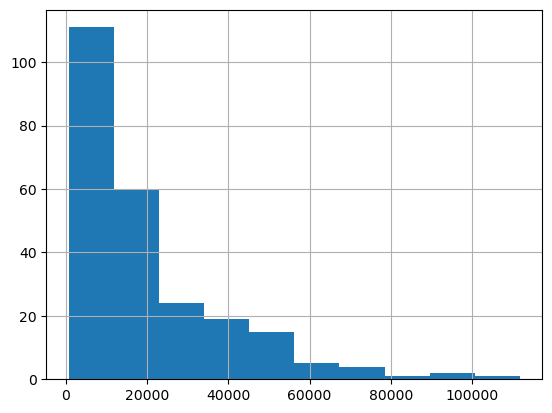

In [21]:
#Define a variable for the GDP per capita for the year 2020
gdp_per_cap2020 = gdp_df[gdp_df['Year'] == 2020]['GDP_Per_Capita']

#Create histogram
gdp_per_cap2020.hist(bins =10)

---

Density plot

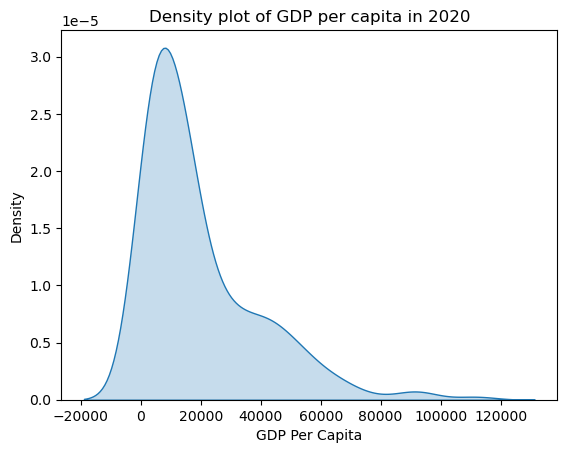

In [43]:
sns.kdeplot(data = gdp_per_cap2020, fill = True)

plt.xlabel('GDP Per Capita')
plt.title('Density plot of GDP per capita in 2020');

---

Boxplot

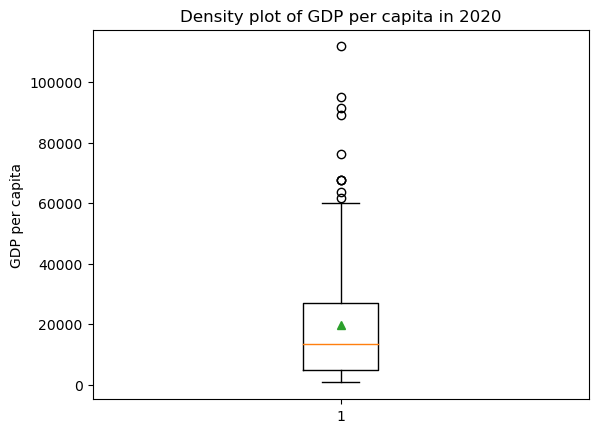

In [55]:
plt.boxplot(x = gdp_per_cap2020, showmeans = True)

plt.ylabel('GDP per capita')
plt.title('Density plot of GDP per capita in 2020');

---

Violin plot

Text(0.5, 1.0, 'Violin plot of GDP per capita in 2020')

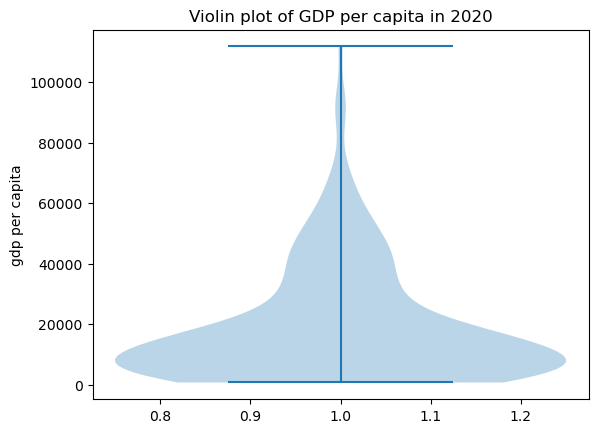

In [62]:
#Create plot
plt.violinplot(dataset = gdp_per_cap2020)

#Add labels
plt.ylabel('gdp per capita')
plt.title('Violin plot of GDP per capita in 2020')

---

9. What was the median GDP per capita value in 2020?

In [64]:
gdp_per_cap2020.median()

13357.997573370474

---

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

- A boxplot
- A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
- A scatterplot
- A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
- Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

---

Boxplot

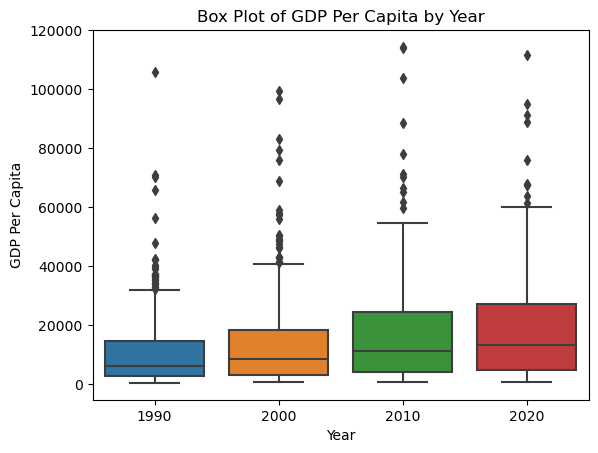

In [82]:
#Subset data
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

#Create boxplot
sns.boxplot(data = gdp_decades, x = 'Year', y = 'GDP_Per_Capita')

#Add labels
plt.ylabel('GDP Per Capita')
plt.title('Box Plot of GDP Per Capita by Year');

---

Barplot

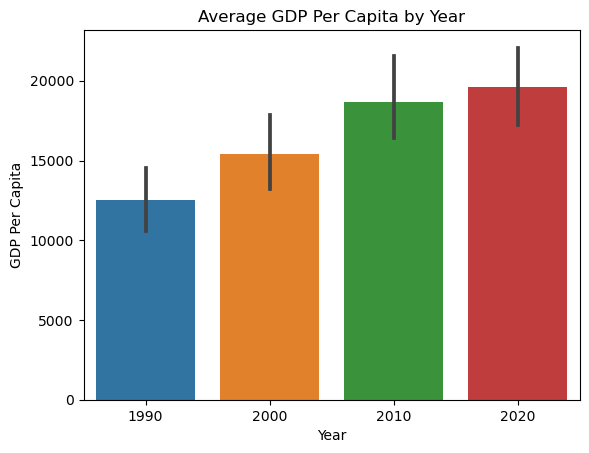

In [90]:
sns.barplot(data = gdp_decades, x = 'Year', y = 'GDP_Per_Capita', estimator = 'mean')

plt.ylabel('GDP Per Capita')
plt.title('Average GDP Per Capita by Year');

The default aggregation method is: estimator = 'mean'.  This can be changed to np.sum, np.median, etc.

---

Scatterplot

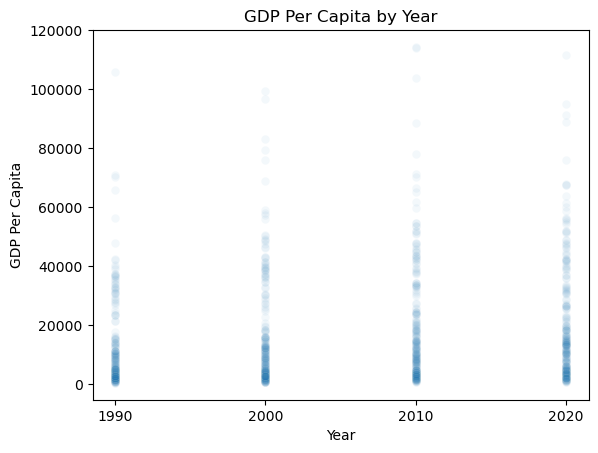

In [107]:
#Plot
sns.scatterplot(data = gdp_decades, 
                x = 'Year', 
                y = 'GDP_Per_Capita', 
                alpha = .05)

#Labels
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita by Year')

#Specify xticks
plt.xticks([1990, 2000, 2010, 2020]);

---

Scatterplot with a trend line

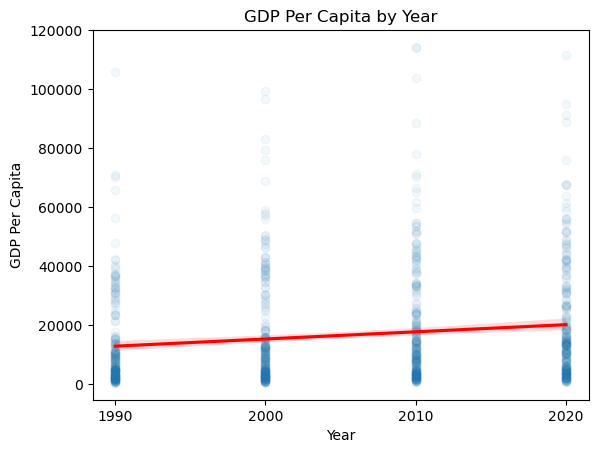

In [108]:
#Plot
sns.regplot(data = gdp_decades, 
            x = 'Year', 
            y = 'GDP_Per_Capita', 
            scatter_kws = {'alpha': 0.05},
            line_kws = {'color' : 'red'})

#Labels
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita by Year')

#Specify xticks
plt.xticks([1990, 2000, 2010, 2020]);

---

11. Which country was the first to have a GDP per capita greater than $100,000?

In [124]:
gdp_df[gdp_df['GDP_Per_Capita'] >= 100000].sort_values(by = 'Year')

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098
4165,Luxembourg,2003,104743.000088
4164,Luxembourg,2004,107634.837198
4163,Luxembourg,2005,108632.360016
4162,Luxembourg,2006,113346.035782
4161,Luxembourg,2007,120647.822959


In the year 1990, United Arab Emirates was the only country to have a GDP per capita greater than $100,000

---

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [133]:
gdp_df[gdp_df['Year'] == 2020].sort_values(by = 'GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751
6108,Singapore,2020,94910.101431
3279,Ireland,2020,91356.855054
5746,Qatar,2020,89019.069857
681,Bermuda,2020,76117.804744
...,...,...,...
5074,Niger,2020,1214.546556
6273,Somalia,2020,1127.418534
1630,Dem. Rep. Congo,2020,1044.071214
1217,Central African Republic,2020,847.765012


Luxembourg had the highest GDP per capita in 2020

In [154]:
#Subset the dataframe to include only Luxembourg
lux_data = gdp_df[gdp_df['Country'] == 'Luxembourg'].sort_values(by = 'Year')

lux_data

,Country,Year,GDP_Per_Capita
4178,Luxembourg,1990,70860.819124
4177,Luxembourg,1991,75961.668717
4176,Luxembourg,1992,76323.304753
4175,Luxembourg,1993,78468.921760
4174,Luxembourg,1994,80365.224508
4173,Luxembourg,1995,80379.127629
4172,Luxembourg,1996,80401.032017
4171,Luxembourg,1997,83702.813530
4170,Luxembourg,1998,88185.800110
4169,Luxembourg,1999,94115.384035


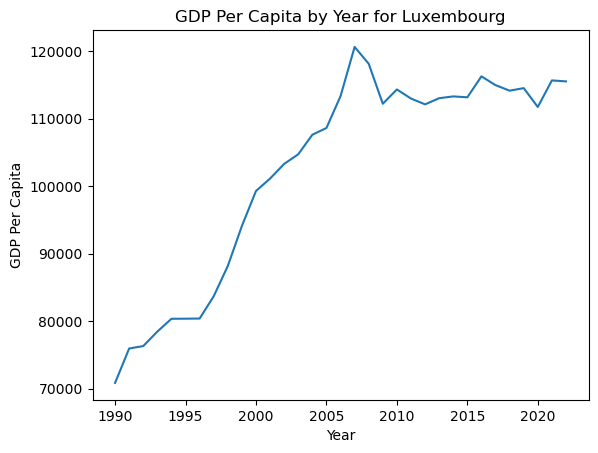

In [156]:
#Create a line plot
sns.lineplot(data = lux_data, 
             x = 'Year', 
             y = 'GDP_Per_Capita',
             errorbar = None)

#Plot labels
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita by Year for Luxembourg');

---

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?